## Neuronale Netze

Problemstellung Klassifikation: [Cat vs. Dog](https://www.kaggle.com/c/dogs-vs-cats/overview). Es stehen 25000 Beispielbilder zur Verfügung. 

Problemstellung Klassifikation: Ein Punkt soll in eine von zwei Klassen eingeteilt werden. Es stehen Beispielpunkte zur Verfügung.

[ConvNetJS](https://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html) - 
[Tensorflow Playground](https://playground.tensorflow.org/)

### Perceptron

Ein Perceptron erhält Inputwerte x1, x2 und berechnet daraus eine gewichtete Summe. Wenn diese Summe
größer als ein Schwellwert ist, bedeutet es, dass das Perceptron aktiviert wird und "feuert", d.h. eine 1 ausgibt. 

<img src="./img/nn_01.png" width="800"/>   

In der Gleichung bringen wir den Schwellwert auf die andere Seite. Den negativen Schwellwert nennen wir den **Bias b**. Je größer der Bias, desto einfacher ist es, das Perceptron zu aktivieren. Der Ausgabewert des Perceptrons hängt von den Inputwerten x1, x2 und den drei Parametern w1, w2 und b ab.

<img src="./img/nna_01.png" width="800"/>  

In [1]:
class Perceptron:
    def __init__(self,param):
        self.w1, self.w2, self.b = param
    
    def calc(self, x1, x2):
        z = self.w1 * x1 + self.w2 * x2 + self.b
        if z >= 0: return 1
        else: return 0


In [2]:
pc = Perceptron([1,-2,-4])
print(pc.calc(3,2))
print(pc.calc(3,-2))


0
1


Wir möchten ein Perceptron, das sich bei 0-1 Inputs wie ein logisches **OR** verhält. 

<img src="./img/nn_02.png" width="300"/>   

In [3]:
X = [(0,0),(0,1),(1,0),(1,1)]
Y = [0,1,1,1]
pc = Perceptron([1,1,-0.5])
for (x1,x2),y in zip(X,Y):
    print(x1,x2,pc.calc(x1,x2),y)

0 0 0 0
0 1 1 1
1 0 1 1
1 1 1 1


#### Übung

Bestimme die Parameter eines Perceptrons, das für die Punkte (2/4) und (6/3) feuert, aber nicht für (6/4). Überprüfe das Ergebnis in Python. Nutze dazu die Perceptron-Klasse von oben.


Wir möchten, dass das Perceptron geeignete Werte für seine Parameter selbst findet (lernt). Wir starten mit zufälligen Anfangswerten und messen den Fehler.

In [4]:
X = [(0,0),(0,1),(1,0),(1,1)]
Y = [0,1,1,1]
pc = Perceptron([-1,1,-1.5])
for (x1,x2),y in zip(X,Y):
    print(x1,x2,pc.calc(x1,x2),y)

0 0 0 0
0 1 0 1
1 0 0 1
1 1 0 1


Dieses Perceptron macht viele Fehler. Wenn wir ein bisschen an den Parametern drehen, können wir leider nicht sehen, ob wir uns in die richtige Richtung bewegen.

In [97]:
X = [(0,0),(0,1),(1,0),(1,1)]
Y = [0,1,1,1]
pc1 = Perceptron([-1.1, 1, -1.5])
pc2 = Perceptron([-0.9, 1, -1.5])
for (x1,x2),y in zip(X,Y):
    print(x1,x2,pc1.calc(x1,x2),pc2.calc(x1,x2), y)


0 0 0 0 0
0 1 0 0 1
1 0 0 0 1
1 1 0 0 1


### Neuron

Das Neuron nutzt eine Aktivierungfunktion, die es erlaubt, bei Parameteränderungen zu erkennen, ob der Fehler größer oder kleiner wird.  Zunächst nutzen wir die **sigmoid**-Funktion als Aktivierungsfunktion.

<img src="./img/nna_02.png" width="700"/>  

<img src="./img/nn_03.png" width="500"/>  

In [5]:
import math
class Neuron:
    def __init__(self,param):
        self.w1, self.w2, self.b = param
    
    def calc(self, x1, x2):
        z = self.w1 * x1 + self.w2 * x2 + self.b
        return 1/(1+math.exp(-z))


In [7]:
X = [(0,0),(0,1),(1,0),(1,1)]
Y = [0,1,1,1]
n1 = Neuron([-1.1, 1, -1.5])
n2 = Neuron([-0.9, 1, -1.5])
for (x1,x2),y in zip(X,Y):
    print(x1,x2,n1.calc(x1,x2),n2.calc(x1,x2), y)


0 0 0.18242552380635635 0.18242552380635635 0
0 1 0.3775406687981454 0.3775406687981454 1
1 0 0.06913842034334682 0.08317269649392238 1
1 1 0.16798161486607552 0.19781611144141825 1


Wir messen den Fehler, den das Neuron bei einer Berechnung macht, als den halben quadratischen Abstand zum
gewünschten Ergebnis.

<img src="./img/nna_03.png" width="900"/>  

In [5]:
x1, x2 = 1, 0
y = 1

n1 = Neuron([-1.1, 1, -1.5])
n2 = Neuron([-0.9, 1, -1.5])

a = n1.calc(x1,x2)
loss = 0.5*(y -a)**2
print(loss)

a = n2.calc(x1,x2)
loss = 0.5*(y -a)**2
print(loss)

0.43325164024043983
0.42028615222711274


Der Gesamtfehler wird über alle Eingaben gemittelt

In [8]:
X = [(0,0),(0,1),(1,0),(1,1)]
Y = [0,1,1,1]
n1 = Neuron([-1.1, 1, -1.5])
n2 = Neuron([-0.9, 1, -1.5])
loss1 = loss2 = 0
for (x1,x2),y in zip(X,Y):
    a1 = n1.calc(x1,x2)
    a2 = n2.calc(x1,x2)
    loss1 = loss1 + 0.5*(y-a1)**2
    loss2 = loss2 + 0.5*(y-a2)**2
loss1 = loss1 / 4
loss2 = loss2 / 4
print(loss1, loss2)

0.24743657055225335 0.23810074828168448


#### Übung

Die erwartete Ausgabe für das Neuron mit w1,w2,b = -1,1,-1.5 bei der Eingabe von (3,2) ist 1. Wie groß ist der Fehler?
Ändere durch Ausprobieren die Parameter w1,w2,b so, dass der Fehler kleiner als 0.000008 wird.

In [9]:
x1, x2 = 3, 2
y = 1

n = Neuron([-1, 1, -1.5])
a = n.calc(x1,x2)
 
loss = 0.5*(y -a)**2
print(a,loss,loss<0.000008)

 

0.07585818002124355 0.42701905171682414 False


### Änderungsrate

Wir möchte wissen, wie sich bei Änderung des Parameters der *loss* ändert. Diese Frage wird durch die Ableitung beantwortet. Wenn wir mehrere Funktionen hintereinanderschalten, benötigen wir die Kettenregel. Bei einfachen Verkettungen lässt sich die Ableitungsfunktion berechnen, bei komplizierteren Verkettungen können wir die Ableitung an den Stellen, die uns interessieren, schrittweise berechnen.

<img src="./img/nn_19a.png" width="600"/>   

Wenn man a and der Stelle 2 ein klein wenig schubst, ändert sich c um das 60-fache.

In [31]:
def f(a):
    b = 2*a + 1
    c = 3*b**2
    return c

a = 2
c = f(a)

a1 = 2.001   # Änderung von a um 0.001
c1 = f(a1)
print(c, c1)

75 75.06001199999999


### Gradient

Um herauszufinden, in welchem Verhältnis wir die Parameter ändern müssen, damit der Fehler geringer wird, nutzen wir den **Gradienten**.

Der Fehler ist abhängig von den 3 Parametern w1, w2 und b. Wir versuchen den Fehler zu minimieren. Der Gradient gibt die Richtung des steilsten Anstiegs an. Um unseren Funktionswert zu minimieren, gehen wir mit unseren Parametern in Richtung des negativen Gradienten (**gradient descent**).



Um den Gradienten einer Funktion zu berechnen, stellen wir sie in einem **computation graph** dar. Wir notieren die partiellen Ableitungen (lokaler Gradient) an den entsprechenden Verbindungen. Den Gradienten erhalten wir durch Multiplikation der lokalen Gradienten längs des entsprechenden Pfades.



#### Beispiel 1:

Bestimme den Wert der Funktion Funktion $f(x_1,x_2,x_3) = (x_1^2 + 3x_2) \cdot 2x_3$ am Punkt $x = (2,-1,3)$.
Gehe von $x$ aus um $0.01$ Längeneinheiten in Richtung des negativen Gradienten zum Punkt $x'$ und werte dort die Funktion erneut aus.

<img src="./img/nn_19.png" width="800"/>    



#### Beispiel 2:
Bestimme den Wert der Funktion $f(x_1,x_2,x_3) = (x_1\cdot x_2 + x_1^2) \cdot (x_3 - 5)$ am Punkt $x = (1,-2,2)$.
Gehe von $x$ aus um $0.01$ Längeneinheiten in Richtung des negativen Gradienten zum Punkt $x'$ und werte dort die Funktion erneut aus.
(Mit etwas Übung kann man bei einfachen Funktionen die partiellen Ableitungen direkt hinschreiben). 

<img src="./img/nn_20.png" width="800"/>  



#### Beispiel 3: 
Wenn es auf dem Weg zurück zur Variablen mehrere Wege gibt, werden die Werte der Pfade addiert.

Bestimme den Wert der Funktion $f(x_1,x_2,x_3) = (x_1 + 2x_2)(x_2 +4x_3)$ am Punkt $x = (-1,2,3)$. Gehe von $x$ aus um $0.02$ Längeneinheiten in Richtung des negativen Gradienten zum Punkt $x'$ und werte dort die Funktion erneut aus.

<img src="./img/nn_21.png" width="900"/>   

In diesem Beispiel ist es noch möglich, die partiellen Ableitungen direkt hinzuschreiben. Die Addition der Pfade spiegelt sich in der Addition bei der Produktregel.

<img src="./img/nn_21a.png" width="500"/> 

#### Übung

Bestimme den Wert der Funktion $f(x_1,x_2,x_3) = (x_1^2 -4x_3)(4x_1x_2 - x_3)$  am Punkt $x = (1,2,-1)$. Gehe von $x$ aus um $0.1$ Längeneinheiten in Richtung des negativen Gradienten zum Punkt $x'$ und werte dort die Funktion erneut aus.





### Die lokalen Gradienten eines Neurons


Übung: Zeige $\sigma^{\prime}(z) = \sigma(z) \cdot (1-\sigma(z))$



<img src="./img/nn_08.png" width="701"/>  

Wir fassen alles zu einer Einheit zusammen

<img src="./img/nn_22.png" width="601"/>  

In [1]:
import math
class Neuron:
    def __init__(self,param):
        self.w1, self.w2, self.b = param
    
    def forward(self, x1, x2):
        z = self.w1 * x1 + self.w2 * x2 + self.b
        a = 1/(1+math.exp(-1.0*z))
        
        # Wir merken uns die lokalen Gradienten
        self.db = a *(1-a)
        self.dw1 = x1 * self.db   
        self.dw2 = x2 * self.db
        self.dx1 = self.w1 * self.db
        self.dx2 = self.w2 * self.db
        return a
    


In [6]:
n.w1, n.w2, n.b
a = n.forward(3,2)
a, n.dw1, n.dw2, n.db

(0.07585818002124355,
 0.21031114963532443,
 0.1402074330902163,
 0.07010371654510815)

#### Übung

Berechne für $x = (3,2)$ den Output und die lokalen Gradienten des Neurons <br>
```n = Neuron([-1,2,-4])``` <br>


### Fehlerberechnung Neuron

Die Berechnung des Fehlers als computational graph

<img src="./img/nn_15.png" width="601"/>  

#### Beispiel

Für das Neuron  &nbsp; ```n = Neuron([-1,2,-4])```  &nbsp; ist $y = 1$ der erwartete Output bei $x = (-1,2)$.
Berechne die neuen Werte für $w_1, w_2, b$ nach einem Durchgang forward/backward-propagation bei einer learning-rate von 0.2

<img src="./img/nn_23.png" width="801"/>  


In [23]:
import math
import random

class Neuron:
    def __init__(self,param):
        self.w1, self.w2, self.b = param
    
    def forward(self, x1, x2):
        z = self.w1 * x1 + self.w2 * x2 + self.b
        print("z=",z)
        a = 1/(1+math.exp(-1.0*z))
        
        # wir berechnen die lokalen Gradienten
        self.db = a *(1-a)    
        print("a*(1-a)",self.db)
        self.dw1 = x1 * self.db   
        self.dw2 = x2 * self.db
        #self.dx1 = self.w1 * self.db
        #self.dx2 = self.w2 * self.db
        return a
    
    def backward(self, g):
        # wir multiplizieren den lokalen Gradienten mit
        # dem upstream Gradienten g
        self.db *= g
        self.dw1 *= g
        self.dw2 *= g
        #self.dx1 *= g
        #self.dx2 *= g
        
    def update(self,lr):
        self.w1 = self.w1 - lr * self.dw1
        self.w2 = self.w2 - lr * self.dw2
        self.b = self.b - lr * self.db


In [24]:
n = Neuron([-1,1,-1.5])

In [25]:
n = Neuron([-1,1,-1.5])
a = n.forward(1,0)
print('-- nach forward propagation ---') 
print("a = {:6.4f}".format(a))
print("db = {:6.4f}".format(n.db))
print("dw1 = {:6.4f}, dw2 = {:6.4f}".format(n.dw1,n.dw2))

y = 1
print("loss={:6.4f}".format(0.5*(y-a)**2))
g = a - y  # upstream gradient
print("g={:6.4f}".format(g))
n.backward(g)
print('-- nach backward propagation ---')
print("db = {:6.4f}".format(n.db))
print("dw1 = {:6.4f}, dw2 = {:6.4f}".format(n.dw1,n.dw2))

print('-- nach Parameterupdate ---')
n.update(0.03)
print("b = {:6.4f}".format(n.b))
print("w1 = {:6.4f}, w2 = {:6.4f}".format(n.w1,n.w2))

print('-- neues Ergebnis:') 
a = n.forward(1,0)
print("a = {:6.4f}".format(a))

z= -2.5
a*(1-a) 0.07010371654510815
-- nach forward propagation ---
a = 0.0759
db = 0.0701
dw1 = 0.0701, dw2 = 0.0000
loss=0.4270
g=-0.9241
-- nach backward propagation ---
db = -0.0648
dw1 = -0.0648, dw2 = -0.0000
-- nach Parameterupdate ---
b = -1.4981
w1 = -0.9981, w2 = 1.0000
-- neues Ergebnis:
z= -2.4961128534282837
a*(1-a) 0.07033518368744232
a = 0.0761


### Ein Neuron für die OR-Funktion

Wir initialisieren die Parameter des Neurons mit zufälligen Werten. Wir spendieren dem Neuron noch weitere Attribute, damit es
die Änderungswünsche der vier Eingabepunkte aufsummieren kann. Die Änderung der Parameter orientiert sich dann an dem Durchschnitt aller Änderungswünsche.

In [66]:
import math

class Neuron:
    def __init__(self,param):
        self.w1, self.w2, self.b = param
        self.sumdb = 0
        self.sumdw1 = 0
        self.sumdw2 = 0
    
    def forward(self, x1, x2):
        z = self.w1 * x1 + self.w2 * x2 + self.b
        a = 1/(1+math.exp(-1.0*z))
        
        # wir berechnen die lokalen Gradienten
        self.db = a *(1-a)    
        self.dw1 = x1 * self.db   
        self.dw2 = x2 * self.db
        self.dx1 = self.w1 * self.db
        self.dx2 = self.w2 * self.db
        return a
    
    def backward(self, g):
        
        # wir multiplizieren den lokalen Gradienten mit
        # dem upstream Gradienten g
        self.db *= g
        self.dw1 *= g
        self.dw2 *= g
        self.dx1 *= g
        self.dx2 *= g
        
        # wir addieren die Änderungswünsche
        self.sumdb += self.db 
        self.sumdw1 += self.dw1
        self.sumdw2 += self.dw2 
        
    def update(self,lr):
        self.w1 = self.w1 - lr * self.sumdw1
        self.w2 = self.w2 - lr * self.sumdw2
        self.b = self.b - lr * self.sumdb
        
        # reset Änderungswünsche für neuen Durchgang
        self.sumdw1 = 0
        self.sumdw2 = 0
        self.sumdb = 0
        
        

In [71]:
n = Neuron([-1, 1, -1.5])
lr = 0.1

X  = [(0,0),(0,1),(1,0),(1,1)]
Y = [0,1,1,1]
for k in range(10000):
    for (x1,x2),y in zip(X,Y):
        a = n.forward(x1,x2)
        n.backward(a-y)
    n.update(lr)

for (x1,x2) in X:
    print(n.forward(x1,x2))

0.05477788660656421
0.9657946341792935
0.9657777325838186
0.9999272754808666


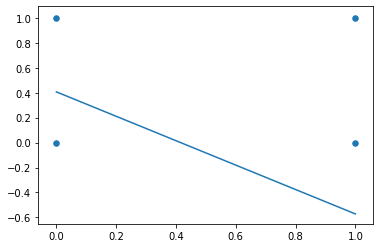

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
def plotGerade(w1, w2, b):
    m = -w1/w2
    c = -b/w2
    y0 = c
    y1 = m + c
    plt.plot([0,1],[y0,y1])
    plt.scatter([0,0,1,1], [0,1,0,1], s=30)
    
plotGerade(n.w1, n.w2, n.b)

### Berechnen der Parameter für eine XOR-Erkennung

Mit einem Neuron können wir kein **XOR** modellieren. Wie vernetzen 3 Neuronen und lassen das Netz die 9 Parameter lernen.


<img src="./img/nn_16.png" width="400"/>  

Da nur die Layer mit Parametern gezählt werden, ist das Netz ein 2-Layer Netz. Für die hidden Layer eignet sich die 
**Relu** Aktivierungsfunktion besser.



### Relu 

Relu = rectified linear unit, $f(x) = max(0,x)$

<img src="./img/nn_17.png" width="400"/>  

Der lokale Gradient der Relu-Funktion

<img src="./img/nn_18.png" width="400"/>  

<img src="./img/nn_24.png" width="900"/>   

Das Netz implementiert die abgebildeten Verknüpfungen

In [ ]:
import math
class Netz:
    def __init__(self,param):
        self.w11, self.w12, self.b1, self.w21, self.w22, self.b2, self.w31, self.w32, self.b3 = param
   
    def forward(self, x1, x2):
        z1 = self.w11 * x1 + self.w12 * x2 + self.b1   
        a1 = z1 if z1 > 0 else 0 
        
        z2 = self.w21 * x1 + self.w22 * x2 + self.b2 
        a2 = z2 if z2 > 0 else 0 
        
        z3 = self.w31 * a1 + self.w32 * a2 + self.b3
        a3 = 1/(1+math.exp(-1.0*z3))
        
        # wir berechnen die lokalen gradienten 
        self.db3 = a3 *(1-a3)    
        self.dw31 = db3*a1 * self.db3   
        self.dw32 = a2 * self.db3
        self.d1 = self.w1 * self.db
        self.dx2 = self.w2 * self.db
        
        
        
        g = a3 - y
        
        # backward
        db3 =  g * a3*(1-a3)
        dw31 = db3 * a1
        dw32 = db3 * a2
 
        db1 = db3 * self.w31 if z1 > 0 else 0
        dw11 = db1 * x1
        dw12 = db1 * x2
        
        db2 = db3 * self.w32 if z2 > 0 else 0
        dw21 = db2 * x1
        dw22 = db2 * x2
        
        return a3
    
    def update(self, lr):
        
        self.w11 = self.w11 - lr * self.dw11
        self.w12 = self.w12 - lr * self.dw12
        self.b1 = self.b1 - lr * self.db1
        self.w21 = self.w21 - lr * self.dw21
        self.w22 = self.w22 - lr * self.dw22
        self.b2 = self.b2 - lr * self.db2
        self.w31 = self.w31 - lr * self.dw31
        self.w32 = self.w32 - lr * self.dw32
        self.b3 = self.b3 - lr * self.db3
        

In [72]:
import math
class Netz:
    def __init__(self,param):
        self.w11, self.w12, self.b1, self.w21, self.w22, self.b2, self.w31, self.w32, self.b3 = param
   
    def calc(self, x1, x2):
        # forward
        z1 = self.w11 * x1 + self.w12 * x2 + self.b1   
        a1 = z1 if z1 > 0 else 0 
        
        z2 = self.w21 * x1 + self.w22 * x2 + self.b2 
        a2 = z2 if z2 > 0 else 0 
        
        z3 = self.w31 * a1 + self.w32 * a2 + self.b3
        a3 = 1/(1+math.exp(-1.0*z3))
        
        g = a3 - y
        
        # backward
        db3 =  g * a3*(1-a3)
        dw31 = db3 * a1
        dw32 = db3 * a2
 
        db1 = db3 * self.w31 if z1 > 0 else 0
        dw11 = db1 * x1
        dw12 = db1 * x2
        
        db2 = db3 * self.w32 if z2 > 0 else 0
        dw21 = db2 * x1
        dw22 = db2 * x2
        
        return a3
    
    def update(self, lr):
        
        self.w11 = self.w11 - lr * self.dw11
        self.w12 = self.w12 - lr * self.dw12
        self.b1 = self.b1 - lr * self.db1
        self.w21 = self.w21 - lr * self.dw21
        self.w22 = self.w22 - lr * self.dw22
        self.b2 = self.b2 - lr * self.db2
        self.w31 = self.w31 - lr * self.dw31
        self.w32 = self.w32 - lr * self.dw32
        self.b3 = self.b3 - lr * self.db3
        


In [73]:
param = [-3, 2, 5, 3, -1, -1, -1, 5, -1]
netz = Netz(param)

Wir erweitern die Klasse Netz um die Summenfelder für die Änderungswünsche

In [7]:
import math
class Netz:
    def __init__(self,param):
        self.w11, self.w12, self.b1, self.w21, self.w22, self.b2, self.w31, self.w32, self.b3 = param
        self.sumdw11 = self.sumdw12 = self.sumdb1 = self.sumdw21 = self.sumdw22 = self.sumdb2 = 0
        self.sumdw31 = self.sumdw32 = self.sumdb3 = 0
   
    def calc(self, x1, x2, y=0):
        
        # forward
        z1 = self.w11 * x1 + self.w12 * x2 + self.b1 
        a1 = z1 if z1 > 0 else 0 
        
        z2 = self.w21 * x1 + self.w22 * x2 + self.b2 
        a2 = z2 if z2 > 0 else 0 
        
        z3 = self.w31 * a1 + self.w32 * a2 + self.b3
        a3 = 1/(1+math.exp(-1.0*z3))
        
        g = a3 - y
     
        # backward
        db3 =  g * a3*(1-a3)
        dw31 = db3 * a1
        dw32 = db3 * a2
 
        db1 = db3 * self.w31 if z1 > 0 else 0
        dw11 = db1 * x1
        dw12 = db1 * x2
        
        db2 = db3 * self.w32 if z2 > 0 else 0
        dw21 = db2 * x1
        dw22 = db2 * x2
        
        self.sumdb1 += db1
        self.sumdw11 += dw11
        self.sumdw12 += dw12
        
        self.sumdb2 += db2
        self.sumdw21 += dw21
        self.sumdw22 += dw22
        
        self.sumdb3 += db3
        self.sumdw31 += dw31
        self.sumdw32 += dw32
        
        return a3
    
    def update(self, lr):
        
        self.w11 = self.w11 - lr * self.sumdw11
        self.w12 = self.w12 - lr * self.sumdw12
        self.b1 = self.b1 - lr * self.sumdb1
        self.w21 = self.w21 - lr * self.sumdw21
        self.w22 = self.w22 - lr * self.sumdw22
        self.b2 = self.b2 - lr * self.sumdb2
        self.w31 = self.w31 - lr * self.sumdw31
        self.w32 = self.w32 - lr * self.sumdw32
        self.b3 = self.b3 - lr * self.sumdb3
        
        self.sumdw11 = self.sumdw12 = self.sumdb1 = self.sumdw21 = self.sumdw22 = self.sumdb2 = 0
        self.sumdw31 = self.sumdw32 = self.sumdb3 = 0
 

In [11]:
X  = [(0,0),(0,1),(1,0),(1,1)]
Y = [0,1,1,0]
param = [-3, 2, 5, 3, -1, -1, -1, 5, -1]        # bei 1 noch schlecht, bei 1000 schlecht, bei 10000 gut
#param = [-3, 2, -5, 3, -1, -1, -1, 5, -1]      # kommt zu keinem richtigen Ergebnis.
lr = 0.1
netz = Netz(param)
for i in range(10000):
    for (x1,x2),y in zip(X,Y):
        netz.calc(x1,x2,y)
        netz.update(0.1)
for (x1,x2),y in zip(X,Y):
    print(netz.calc(x1,x2,y))

0.02152887960849732
0.9865561278944127
0.9925728614413033
0.007333030796455198


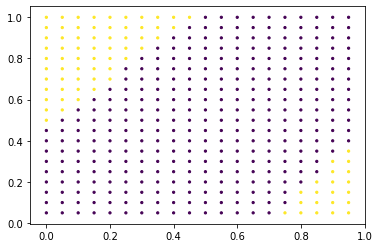

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

x1 = 0
X1, X2, Y = [], [], []
while x1 < 1:
    x2 = 0
    while x2 < 1:
        x2 += 0.05
        X1.append(x1)
        X2.append(x2)
        Y.append(netz.calc(x1,x2) > 0.5)
    x1 += 0.05

plt.scatter(X1, X2, c=Y,s=5)
